<a href="https://colab.research.google.com/github/hangli-hl/hangli-hl.github.io/blob/master/Supervised_Learning_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

array1 = np.array([[1, 2], [3, 4], [5, 6]])
array2 = np.array([1, 1, 1])

tupple = zip(array1, array2)

for element1, element2 in tupple:
  print(element1, element2)

array1 = np.array([[1, 2], [3, 4], [5, 6]])
array2 = np.ones(3)

array3 = np.column_stack((array1, array2))

print(array3)

mat1 = np.array([[1, 0],
              [2, 1]])
mat2 = np.array([1, 2])

mat3 = np.matmul(mat1, mat2)

mat4 = np.dot(mat1, mat2)

print(mat3)

print(mat4)

mat1 = np.array([[1, 1],
              [0, 1]])
mat2 = np.array([[4, 1],
              [2, 2]])

mat3 = np.matmul(mat1, mat2)

print(mat3)


[1 2] 1
[3 4] 1
[5 6] 1
[[1. 2. 1.]
 [3. 4. 1.]
 [5. 6. 1.]]
[1 4]
[1 4]
[[6 3]
 [2 2]]


# Linear Regression

Linear Regression

training instances: [[-1.69476684e+00  1.11967517e+00]
 [-2.46363074e-01  8.93860711e-01]
 [ 1.91195805e+00  1.53983482e-01]
 [ 4.48185464e-03 -1.71179547e+00]
 [-9.26244080e-01 -4.69996698e-04]
 [ 7.16919984e-01  1.21495614e+00]
 [-4.76235467e-01 -1.73625461e+00]
 [-8.47417603e-01  1.63837411e+00]
 [-1.14645859e+00 -1.91504153e-01]
 [ 1.72482408e+00 -1.90040309e+00]
 [ 4.02195670e-01  1.80051800e+00]
 [-1.07878848e+00  1.93959677e-01]
 [ 1.63651350e+00 -1.46732222e+00]
 [ 9.36503227e-02  1.00163944e+00]
 [ 6.76052964e-01 -1.28988561e-01]
 [-1.18060364e+00 -3.69364436e-02]
 [-5.10461242e-01 -9.03953806e-02]
 [-5.36438457e-01  1.35167198e+00]
 [ 1.07459003e+00 -7.44021291e-01]
 [ 2.90501331e-01 -8.95803807e-01]
 [-1.88628270e-01 -5.88086536e-01]
 [ 6.29597851e-01 -5.18595668e-01]
 [-1.63628088e-01  8.77296490e-01]
 [-3.48032684e-01  1.62569308e+00]
 [-1.27819352e+00  9.64475492e-01]
 [-3.10503825e-01 -2.94185709e-01]
 [ 5.37519475e-01  9.16248041e-02]
 [-3.40456086e-01 -1.99429248e+00]


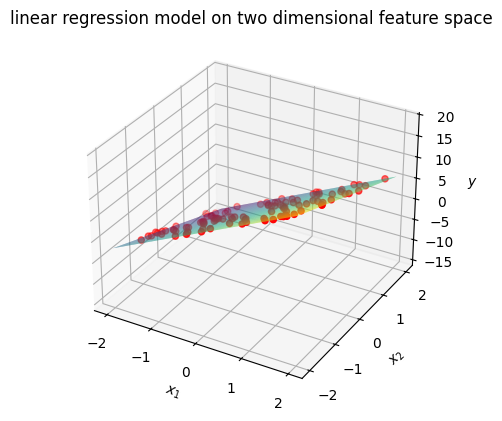

test instances: [[-1.84386739  1.17192673]
 [-1.79217242  1.30777411]
 [-1.96480356  0.69644531]
 [-1.3371443  -0.62849905]
 [ 1.81100558 -0.05506611]
 [ 0.62970554  0.96294039]
 [-1.56028809  1.35518303]
 [ 1.65567975 -1.37831739]
 [ 0.18495372 -0.86597951]
 [ 0.96258692 -1.88691843]
 [ 0.05018801  1.17125942]
 [ 0.93894763 -1.56726467]
 [ 1.33176043 -1.04863708]
 [ 1.23115052 -0.01148467]
 [-1.35669694  0.93616271]
 [ 1.23165181  0.7956046 ]
 [ 1.85938536 -0.9754222 ]
 [-1.05695069 -1.41107963]
 [ 0.15762484 -0.40220471]
 [-0.57335181 -0.1587816 ]
 [-0.90183109 -1.98295849]
 [-0.11299724 -0.89646193]
 [-0.20086556  1.71550046]
 [-1.28397837  0.54993431]
 [ 0.57765959 -0.87482727]
 [-0.11644801  1.87844657]
 [-0.6301595   0.84938073]
 [ 1.36087662 -0.55723557]
 [ 1.95965654  0.50347696]
 [ 0.00394108  0.85963007]
 [-0.30468026  0.84930689]
 [-0.90079047  1.70883326]
 [ 0.16785135 -1.03340203]
 [-0.25121333  1.58038616]
 [ 1.22822128 -0.06212419]
 [-0.59319329 -0.49501034]
 [ 1.9247814

In [ ]:
#
#  Linear Regression Learning Algorithm
#

import numpy as np
import matplotlib.pyplot as plt


# plot learning curve (loss vs interation)
def plot_learning_curve(losses, epochs):
    x1 = np.arange(0, epochs)
    x2= losses

    plt.plot(x1, x2, label = '$loss$')

    plt.legend()
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.xscale('log')
    plt.grid()
    plt.show()


def plot_linear_regressor(instances, values, weights, bias):

    # plot linear regression model, instances and values
    # set up 3d space
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # plot points of instances
    ax.scatter(instances[:,0], instances[:,1], values, c='red', marker='o')

    # calculate points in 2d space
    x1_range=[-2, 2]
    x2_range=[-2, 2]
    num_steps = 50

    # calculate points in 3d space
    x1 = np.linspace(x1_range[0], x1_range[1], num_steps)
    x2 = np.linspace(x2_range[0], x2_range[1], num_steps)
    X1, X2 = np.meshgrid(x1, x2)

    Y = weights[0] * X1 + weights[1] * X2 + bias

    # plot surface of model
    ax.plot_surface(X1, X2, Y, alpha=0.7, cmap='viridis')

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')
    ax.set_title('linear regression model on two dimensional feature space')
    plt.show()


# calculate mean squared error in regression
def calculate_mse(values, predicted_values):
    errors = (values - predicted_values) ** 2
    mse = np.mean(errors)
    return mse


#  class of linear regression
class Linear_Regression:
    def __init__(self, num_features):

        # initialize model parameters
        self.num_features = num_features
        self.weights = np.zeros(num_features)
        self.bias = 0

    def predict(self, instances):
        # make prediction given input instance (features)
        # linear regression function
        values = np.dot(instances, self.weights) + self.bias
        return values

    # train linear regression model given training instances and values using gradient descent
    def train_gd(self, instances, values, learning_rate, epochs):

        # iteratively update weights and bias of linear regression model using GD（graident descent）
        losses = np.zeros(epochs)     # store prediction losses
        num_samples = len(instances)

        for epoch in range(epochs):

            # make prediction with current model
            predicted_values = self.predict(instances)
            # calculate errors
            errors = values - predicted_values
            # calculate weight gradient
            weight_gradient = np.dot(errors, instances)
            # calculate bias gradient
            bias_gradient = np.sum(errors)
            # calculate squared loss
            squared_loss = np.mean(errors ** 2)

            # update weights and bias
            self.weights += learning_rate * weight_gradient / num_samples
            self.bias += learning_rate * bias_gradient / num_samples

            # store prediction loss
            losses[epoch] = squared_loss / num_samples

        # plot losses in training
        plot_learning_curve(losses, epochs)


    # train linear reggresion model using normal equation
    def train_ne(self, instances, values):

        # expand instances by adding one dimension of ones
        num_samples = len(instances)
        ones = np.ones(num_samples)
        instances = np.column_stack((instances, ones))

        # compute pseudo inverse
        pseudoinverse = np.linalg.pinv(instances)

        # solve problem using psedo inverse, get weights with bias
        weights_with_bias = np.matmul(pseudoinverse, values)

        # set weights and bias
        self.weights = weights_with_bias[: -1]
        self.bias = weights_with_bias[-1]


def create_data():

    # # dataset one
    # num_features = 1
    # training_instances = np.array([[0.5], [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0]])
    # training_values = np.array([1.78, 1.93, 2.19, 2.54, 2.68, 3.04, 3.2, 3.28, 3.98, 3.87])

    # test_instances = [[0.7], [1.2], [1.7]]
    # test_values = [1.8, 2.0, 2.2]

    #dataset two, generate data from model
    true_weights = np.array([5, -3])
    true_bias = 2
    num_features = 2
    num_samples = 100

    np.random.seed(7)
    def generate_data():
        features = np.random.uniform(low=-2, high=2, size=(num_samples, num_features))
        values = np.dot(features, true_weights) + true_bias
        values += np.random.normal(loc=0.0, scale=0.2, size=num_samples)
        return features, values

    training_instances, training_values = generate_data()
    test_instances, test_values = generate_data()

    return training_instances, training_values, test_instances, test_values, num_features


if __name__ == '__main__':

    # create data set
    training_instances, training_values, test_instances, test_values, num_features = create_data()

    # hyperparameters for learning
    learning_rate = 0.01
    epochs = 10000

    # initialize perceptron
    model = Linear_Regression(num_features)

    # train model from training instances and values using gradient descent
    #model.train_gd(training_instances, training_values, learning_rate, epochs)

    # # alternatively, training model from training instances and values using normal equation
    model.train_ne(training_instances, training_values)

    # plot linear model, instances and values
    # plot only when data is in two dimensional space
    print('training instances:', training_instances)
    print('training values:', training_values)
    print('model:', model.weights, model.bias)
    if (num_features == 2):
        plot_linear_regressor(training_instances, training_values, model.weights, model.bias)

    # evaluate accuracy of model on test data
    predicted_values = model.predict(test_instances)

    # calculate mean squared error
    mse = calculate_mse(test_values, predicted_values)
    print('test instances:', test_instances)
    print('test values:', test_values)
    print('predicted test values:', predicted_values)
    print(f'mean squred errors on test data: {mse:.4f}')


# Perceptron

Perceptron

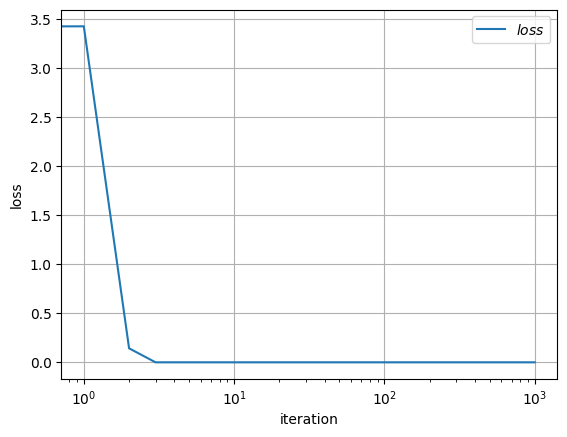

training instances: [[ 5.   9. ]
 [ 3.  12. ]
 [-1.  12. ]
 [ 2.  10. ]
 [ 1.  12. ]
 [ 2.  -3. ]
 [ 4.   4.5]
 [ 1.   1. ]
 [ 1.5 -3. ]
 [ 3.  -2. ]
 [ 4.  -5. ]
 [ 3.5  8. ]
 [-1.   4. ]
 [-1.  -1. ]]
training labels: [ 1  1  1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1]
model: [0.83205029 0.5547002 ] -1.6641005886756874


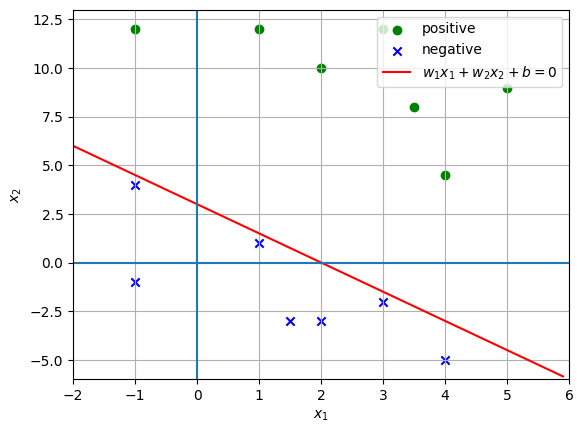

test instances: [[3 5]
 [2 5]]
test labels: [ 1 -1]
predicted test labels: [1 1]
accuracy on test data: 50.0%


In [ ]:


#
#  Perceptron Learning Algorithm
#

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# plot learning curve (loss vs interation)
def plot_learning_curve(losses, epochs):
    x1 = np.arange(0, epochs)
    x2= losses

    plt.plot(x1, x2, label = '$loss$')

    plt.legend()
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.xscale('log')
    plt.grid()
    plt.show()


# plot linear model, instances and labels
def plot_linear_classifier(instances, labels, weights, bias):

    # separate to positive and negative instances
    pos_instances = instances[labels == 1]
    neg_instances = instances[labels != 1]

    # plot instances
    plt.scatter(pos_instances[:, 0], pos_instances[:, 1], marker='o', c='green', label='positive')
    plt.scatter(neg_instances[:, 0], neg_instances[:, 1], marker='x', c='blue', label='negative')

    # calculate points in 2d space
    x1 = np.arange(-2, 6, 0.1)
    k = - weights[0] / weights[1] if weights[1] != 0 else 0
    b = - bias / weights[1] if weights[1] != 0 else 0
    x2 = k * x1 + b

    # plot line of model in 2d space
    plt.plot(x1, x2, label = '$w_1 x_1 + w_2 x_2 + b = 0$', c='red')

    # dynamically set axis limits
    x_min, x_max = instances[:, 0].min() - 1, instances[:, 0].max() + 1
    y_min, y_max = instances[:, 1].min() - 1, instances[:, 1].max() + 1
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.axhline()
    plt.axvline()
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.grid()
    plt.legend()
    plt.show()


# calculate accuracy (1.0-error rate) in classification
def calculate_accuracy(labels, predicted_labels):
    correct_predictions = (labels == predicted_labels)
    accuracy = np.mean(correct_predictions)
    return accuracy


#  class for perceptron learning
class Perceptron:
    def __init__(self, num_features):

        # initialize parameters of model
        self.num_features = num_features
        self.num_classes = 2
        self.weights = np.zeros(num_features)
        self.bias = 0


    # make prediction given an input instance (features)
    def predict(self, instance):

        # function of linear perceptron
        score = np.dot(instance, self.weights) + self.bias
        label = 1 if score >= 0 else -1
        return score, label

    # train a perceptron model given training instances and labels
    def train(self, instances, labels, learning_rate, epochs):

        # iteratively update weights and bias of perceptron using SGD (stochastic gradient descent)
        losses = np.zeros(epochs)   # store prediction losses
        num_samples = len(instances)
        for epoch in range(epochs):
            loss = 0.0
            for instance, label in zip(instances, labels):
                predicted_score, predicted_label = self.predict(instance)
                if label != predicted_label:
                    self.weights += learning_rate * label * instance
                    self.bias += learning_rate * label
                    loss += - label * predicted_score

            # store loss of prediction
            losses[epoch] = loss / num_samples

        # optional: normalize weights and bias using L2 norm of weights
        l2_norm = np.linalg.norm(self.weights, ord=2)
        self.weights = self.weights / l2_norm
        self.bias = self.bias / l2_norm

        # plot losses in training
        plot_learning_curve(losses, epochs)



def create_data():

    # # dataset one
    # num_features = 2
    # training_instances = np.array([[3, 3], [4, 3], [1, 1]])
    # training_labels = np.array([1, 1, -1])

    # test_instances = np.array([[3, 2], [3, -1]])
    # test_labels = np.array([1, -1])

    # dataset two
    num_features = 2
    training_instances = np.array([[5, 9], [3, 12], [-1, 12], [2, 10], [1, 12], [2, -3], [4, 4.5], [1, 1], [1.5, -3], [3, -2], [4, -5], [3.5, 8], [-1, 4], [-1, -1]])
    training_labels = np.array([1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1])

    test_instances = np.array([[3, 5], [2, 5]])
    test_labels = np.array([1, -1])

    # # dataset three: iris data
    # # load the Iris dataset
    # iris = load_iris()

    # # separate instances and labels
    # instances = iris.data  # shape: (150, 4)
    # labels = iris.target  # shape: (150, )
    # num_features = 4

    # # reset labels to 1 or -1
    # labels = np.array([1 if label == 2 else -1 for label in labels])

    # # split into training and test data
    # # test_size=0.2 means 20% of the data is for testing
    # # random_state sets a seed
    # training_instances, test_instances, training_labels, test_labels = train_test_split(
    # instances, labels, test_size=0.2, random_state=21)

    return training_instances, training_labels, test_instances, test_labels, num_features


if __name__ == '__main__':

    # create data set
    training_instances, training_labels, test_instances, test_labels, num_features = create_data()

    # hyperparameters for learning
    learning_rate = 1
    epochs = 1000

    # initialize perceptron
    model = Perceptron(num_features)

    # training model from training instances and labels
    model.train(training_instances, training_labels, learning_rate, epochs)

    # plot linear model, instances and labels
    # plot only when data is in two dimensional space
    print('training instances:', training_instances)
    print('training labels:', training_labels)
    print('model:', model.weights, model.bias)
    if (num_features == 2):
        plot_linear_classifier(training_instances, training_labels, model.weights, model.bias)

    # evaluate accuracy of model on test data
    # make prediction on test instances using model
    _, predicted_labels = zip(*[model.predict(instance) for instance in test_instances])
    predicted_labels = np.array(predicted_labels)

    # calcualte accuracy of classification
    accuracy = calculate_accuracy(test_labels, predicted_labels)
    print('test instances:', test_instances)
    print('test labels:', test_labels)
    print('predicted test labels:', predicted_labels)
    print(f'accuracy on test data: {100 * accuracy}%')



# K Nearest Neighbor

K Nearest Neighbor

training instances: [[ 5.   9. ]
 [ 3.  12. ]
 [-1.  12. ]
 [ 2.  10. ]
 [ 1.  12. ]
 [ 2.  -3. ]
 [ 4.   4.5]
 [ 1.   1. ]
 [ 1.5 -3. ]
 [ 3.  -2. ]
 [ 4.  -5. ]
 [ 3.5  8. ]
 [-1.   4. ]
 [-1.  -1. ]]
training labels: [1 1 1 1 1 0 1 0 0 0 0 1 0 0]
test instances: [[ 3.   5. ]
 [ 3.5 -5. ]]
test label: [1 0]
predicted labels: [1, 0]


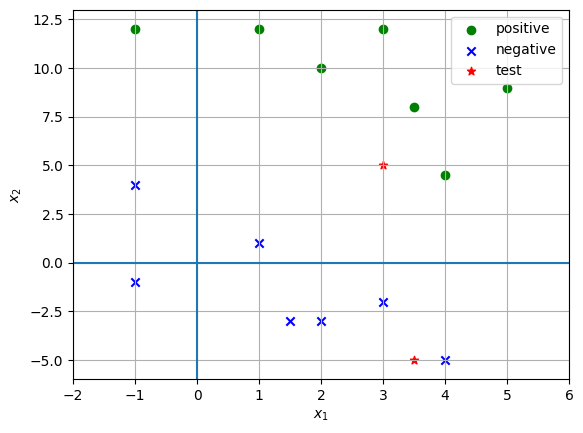

accuracy on test data: 100.0%


In [ ]:

#
#  K Nearest Neighbor Method
#

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


def plot_nearest_neighbor(training_instances, training_labels, test_instances):

    # separate to positive and negative instances
    pos_instances = training_instances[training_labels == 1]
    neg_instances = training_instances[training_labels != 1]

    # plot instances
    plt.scatter(pos_instances[:, 0], pos_instances[:, 1], marker='o', c='green', label='positive')
    plt.scatter(neg_instances[:, 0], neg_instances[:, 1], marker='x', c='blue', label='negative')
    plt.scatter(test_instances[:, 0], test_instances[:, 1], marker='*', color='red', label='test')

    # dynamically set axis limits
    all_instances = np.vstack((training_instances, test_instances))
    x_min, x_max = all_instances[:, 0].min() - 1, all_instances[:, 0].max() + 1
    y_min, y_max = all_instances[:, 1].min() - 1, all_instances[:, 1].max() + 1
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.axhline()
    plt.axvline()
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.grid()
    plt.legend()
    plt.show()

# calculate accuracy (1.0-error rate) in classification
def calculate_accuracy(labels, predicted_labels):
    correct_predictions = (labels == predicted_labels)
    accuracy = np.mean(correct_predictions)
    return accuracy


class Node:
    # initialize node
    def __init__(self, point, label, axis, left=None, right=None):
        self.point = point
        self.label = label
        self.axis = axis
        self.left = left
        self.right = right


class KNearestNeighbor:
    # initialize kd tree
    def __init__(self, points, labels, num_features):
        self.dimensions = num_features
        self.root = self.build_kd_tree(points, labels, depth=0)

    # build kd tree
    def build_kd_tree(self, points, labels, depth):
        if not points:
            return

        axis = depth % self.dimensions

        # sort points and labels together based on the current axis
        points_labels_sorted = sorted(zip(points, labels), key=lambda x: x[0][axis])
        median = len(points_labels_sorted) // 2

        median_point, median_label = points_labels_sorted[median]

        return Node(
            point = median_point,
            label = median_label,
            axis = axis,
            left = self.build_kd_tree([items[0] for items in points_labels_sorted[:median]],
                                    [items[1] for items in points_labels_sorted[:median]], depth + 1),
            right = self.build_kd_tree([items[0] for items in points_labels_sorted[median + 1:]],
                                     [items[1] for items in points_labels_sorted[median + 1:]], depth + 1)
        )

    # recursively search for nearest neighbor
    def search_kd_tree(self, target, node=None, depth=0):
        if node is None:
            return None, float('inf'), None

        current_dist = sum((a - b)**2 for a, b in zip(node.point, target))

        nearest_node = node.point
        nearest_dist = current_dist
        nearest_label = node.label

        axis = node.axis
        if target[axis] < node.point[axis]:
            left_node, left_dist, left_label = self.search_kd_tree(target, node.left, depth + 1)
            if left_dist < nearest_dist:
                nearest_node, nearest_dist, nearest_label = left_node, left_dist, left_label
            if (target[axis] - node.point[axis])**2 < nearest_dist:
                right_node, right_dist, right_label = self.search_kd_tree(target, node.right, depth + 1)
                if right_dist < nearest_dist:
                    nearest_node, nearest_dist, nearest_label = right_node, right_dist, right_label
        else:
            right_node, right_dist, right_label = self.search_kd_tree(target, node.right, depth + 1)
            if right_dist < nearest_dist:
                nearest_node, nearest_dist, nearest_label = right_node, right_dist, right_label
            if (target[axis] - node.point[axis])**2 < nearest_dist:
                left_node, left_dist, left_label = self.search_kd_tree(target, node.left, depth + 1)
                if left_dist < nearest_dist:
                    nearest_node, nearest_dist, nearest_label = left_node, left_dist, left_label

        return nearest_node, nearest_dist, nearest_label


def create_data():

    # # dataset one
    # num_features = 2
    # training_instances = np.array([[2, 3], [5, 4], [9, 6], [4, 7], [8, 1], [7, 2]])
    # training_labels = np.array([1, 1, 0, 1, 0, 1])

    # test_instances = np.array([[2, 2], [10, 5]])
    # test_labels = np.array([1, 0])

    # dataset two
    num_features = 2
    training_instances = np.array([[5, 9], [3, 12], [-1, 12], [2, 10], [1, 12], [2, -3], [4, 4.5], [1, 1], [1.5, -3], [3, -2], [4, -5], [3.5, 8], [-1, 4], [-1, -1]])
    training_labels = np.array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0])

    test_instances = np.array([[3, 5], [3.5, -5]])
    test_labels = np.array([1, 0])

    # # dataset three: iris data
    # # load the Iris dataset
    # iris = load_iris()

    # # separate instances and labels
    # instances = iris.data  # shape: (150, 4)
    # labels = iris.target  # shape: (150, )
    # num_features = 4

    # # reset labels to 1 or -1
    # labels = np.array([1 if label == 1 else 0 for label in labels])

    # # split into training and test data
    # # test_size=0.2 means 20% of the data is for testing
    # # random_state sets a seed
    # training_instances, test_instances, training_labels, test_labels = train_test_split(
    # instances, labels, test_size=0.2, random_state=21)

    return training_instances, training_labels, test_instances, test_labels, num_features


if __name__ == '__main__':

    # create data set
    training_instances, training_labels, test_instances, test_labels, num_features = create_data()

    # store training instance and labels in kd tree, note that they are lists
    model = KNearestNeighbor(list(training_instances), list(training_labels), num_features)

    # find nearest neighbor of test instances
    print('training instances:', training_instances)
    print('training labels:', training_labels)
    print('test instances:', test_instances)
    print('test label:', test_labels)

    # predicted_label of model on test instances
    predicted_labels = []
    for instance in test_instances:
        _, _, nearest_label = model.search_kd_tree(instance, model.root, depth=0)
        predicted_labels.append(nearest_label)
    print('predicted labels:', predicted_labels)
    predicted_labels = np.array(predicted_labels)

    # plot training instances and labels, as well as test instances
    # plot only when data is in two axisal space
    if num_features == 2:
        plot_nearest_neighbor(training_instances, training_labels, test_instances)

    # evaluate accuracy of model on test data
    # calculate accuracy of classification
    accuracy = calculate_accuracy(test_labels, predicted_labels)
    print(f'accuracy on test data: {100 * accuracy}%')



# Naive Bayes

Gaussian Naive Bayes

<ipython-input-6-032cdf44b1b0>:117: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  pos_instances = np.random.multivariate_normal(pos_mean, pos_cov, num_pos_instances)
<ipython-input-6-032cdf44b1b0>:118: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  neg_instances = np.random.multivariate_normal(neg_mean, neg_cov, num_neg_instances)
<ipython-input-6-032cdf44b1b0>:124: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  pos_instances = np.random.multivariate_normal(pos_mean, pos_cov, num_pos_instances)
<ipython-input-6-032cdf44b1b0>:125: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  neg_instances = np.random.multivariate_normal(neg_mean, neg_cov, num_neg_instances)


training instances: [[ 3.80851343  3.59739049]
 [ 2.8844119   5.50608016]
 [ 2.91257424  5.73712711]
 ...
 [-0.34887203 -1.58019335]
 [ 1.4555784  -1.31678978]
 [ 2.5701514  -5.41784531]]
training labels: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1

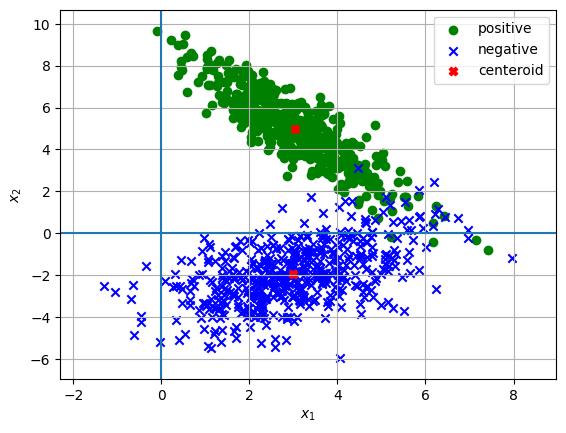

test instances: [[ 2.36839593e+00  6.72896630e+00]
 [ 8.09615937e-01  6.50153622e+00]
 [ 2.85738540e+00  5.56162530e+00]
 [ 1.93798298e+00  7.93469269e+00]
 [ 3.31571014e+00  4.52486163e+00]
 [ 2.38739906e+00  4.95561780e+00]
 [ 3.59744074e+00  5.04314784e+00]
 [ 4.56034341e+00  2.59846889e+00]
 [ 2.07902941e+00  5.58734225e+00]
 [ 2.88101281e+00  6.45658317e+00]
 [ 2.63972935e+00  6.18474177e+00]
 [ 1.69879079e+00  7.37542833e+00]
 [ 3.51628104e+00  4.66819447e+00]
 [ 1.96352711e+00  6.76647227e+00]
 [-4.81667665e-01  9.54062142e+00]
 [ 4.25843464e+00  2.98232163e+00]
 [ 1.51612345e+00  6.65118915e+00]
 [ 2.20881333e+00  6.03420042e+00]
 [ 5.25981038e+00  2.71281367e+00]
 [ 2.35552076e+00  6.60765561e+00]
 [ 2.68373710e+00  4.90224418e+00]
 [ 5.79541115e+00  2.20553932e+00]
 [ 2.63403815e+00  6.11495968e+00]
 [ 2.87887338e+00  4.12706972e+00]
 [ 3.28796461e+00  4.57305118e+00]
 [ 3.37789844e+00  5.97378954e+00]
 [ 9.30694312e-01  7.95871734e+00]
 [ 3.10113939e+00  3.77324456e+00]
 [ 4

In [ ]:
#
# Gaussian Naive Bayes
#

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# plot bayes model, instances and labels
def plot_bayes_classifier(instances, labels, centers):

    # separate to positive and negative instances
    pos_instances = instances[labels == 1]
    neg_instances = instances[labels != 1]

    # plot instances
    plt.scatter(pos_instances[:, 0], pos_instances[:, 1], marker='o', c='green', label='positive')
    plt.scatter(neg_instances[:, 0], neg_instances[:, 1], marker='x', c='blue', label='negative')
    plt.scatter(centers[:, 0], centers[:, 1], marker='X', c='red', label='centeroid')

    # dynamically set axis limits
    x_min, x_max = instances[:, 0].min() - 1, instances[:, 0].max() + 1
    y_min, y_max = instances[:, 1].min() - 1, instances[:, 1].max() + 1
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.axhline()
    plt.axvline()
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.grid()
    plt.legend()
    plt.show()


# calculate accuracy (1.0-error rate) in classification
def calculate_accuracy(labels, predicted_labels):
    correct_predictions = (labels == predicted_labels)
    accuracy = np.mean(correct_predictions)
    return accuracy

class GaussianNaiveBayes:
    # parameters of model
    def __init__(self, num_features, num_classes):
        self.num_features = num_features
        self.num_classes = num_classes
        self.classes = None
        self.class_priors = None
        self.means = None
        self.vars = None

    # train a gaussian naive bayes model given training instances and labels
    def train(self, instances, labels):

        # initialize classes
        num_samples, num_features = instances.shape
        self.classes = np.unique(labels)
        self.num_classes = len(self.classes)

        # initialize mean, variance, and class priors
        self.means = np.zeros((self.num_classes, num_features), dtype=np.float64)
        self.vars = np.zeros((self.num_classes, num_features), dtype=np.float64)
        self.class_priors = np.zeros(self.num_classes, dtype=np.float64)

        # calculate mean, variance, and class priors
        for index, label in enumerate(self.classes):
            instances_in_class = instances[labels == label]
            self.means[index, :] = instances_in_class.mean(axis=0)
            self.vars[index, :] = instances_in_class.var(axis=0)
            self.class_priors[index] = instances_in_class.shape[0] / float(num_samples)


    # make prediction given an input instance (features)
    def predict(self, instance):
        posteriors = self._calculate_posteriors(instance)
        return self.classes[np.argmax(posteriors)]

    # calculate posterior probabilities of classes given an input instance (features)
    def _calculate_posteriors(self, instance):

        posteriors = np.zeros(len(self.classes))
        instance = np.array(instance)

        # calculate posterior probabilities
        for index, _ in enumerate(self.classes):
            prior = np.log(self.class_priors[index])
            likelihood = np.sum(np.log(norm.pdf(instance, self.means[index, :], np.sqrt(self.vars[index, :]))))
            posteriors[index] = prior + likelihood

        return posteriors


def create_data():

    # # dataset one
    # num_features = 2
    # num_classes = 2
    # training_instances = np.array([[5, 9], [3, 12], [-1, 12], [2, 10], [1, 12], [2, -3], [4, 4.5], [1, 1], [1.5, -3], [3, -2], [4, -5], [3.5, 8], [-1, 4], [-1, -1]])
    # training_labels = np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

    # test_instances = np.array([[3, 5], [2, 5]])
    # test_labels = np.array([1, 0])

    # # dataset two
    num_features = 2
    num_classes = 2
    pos_mean = [3, 5]
    pos_cov = [[1, -2], [-2, 3]]
    neg_mean = [3, -2]
    neg_cov = [[1, 2], [2, 1]]

    num_pos_instances = 500
    num_neg_instances = 500
    pos_instances = np.random.multivariate_normal(pos_mean, pos_cov, num_pos_instances)
    neg_instances = np.random.multivariate_normal(neg_mean, neg_cov, num_neg_instances)
    training_instances = np.vstack((pos_instances, neg_instances))
    training_labels = np.hstack((np.ones(num_pos_instances), np.zeros(num_neg_instances)))

    num_pos_instances = 100
    num_neg_instances = 100
    pos_instances = np.random.multivariate_normal(pos_mean, pos_cov, num_pos_instances)
    neg_instances = np.random.multivariate_normal(neg_mean, neg_cov, num_neg_instances)
    test_instances = np.vstack((pos_instances, neg_instances))
    test_labels = np.hstack((np.ones(num_pos_instances), np.zeros(num_neg_instances)))

    # # dataset three: iris data
    # # load the Iris dataset
    # iris = load_iris()

    # # separate instances and labels
    # instances = iris.data  # shape: (150, 4)
    # labels = iris.target  # shape: (150, )
    # num_features = 4
    # num_classes = 4

    # # reset labels to 1 or -1
    # labels = np.array([1 if label == 2 else 0 for label in labels])

    # # split into training and test data
    # # test_size=0.2 means 20% of the data is for testing
    # # random_state sets a seed
    # training_instances, test_instances, training_labels, test_labels = train_test_split(
    # instances, labels, test_size=0.2, random_state=21)

    return training_instances, training_labels, test_instances, test_labels, num_features, num_classes


if __name__ == '__main__':

    # create data set
    training_instances, training_labels, test_instances, test_labels, num_features, num_classes = create_data()

    # initialize gaussian naive bayes
    model = GaussianNaiveBayes(num_features, num_classes)

    # training model from training instances and labels
    model.train(training_instances, training_labels)

    # plot linear model, instances and labels
    # plot only when data is in two dimensional space
    print('training instances:', training_instances)
    print('training labels:', training_labels)
    print('class priors:', model.class_priors)
    print('model:', model.means, model.vars)
    if num_features == 2:
           plot_bayes_classifier(training_instances, training_labels, model.means)

    # evaluate accuracy of model on test data
    # predict labels of model on test instances
    predicted_labels = np.array([model.predict(instance) for instance in test_instances])
    # calcualte accuracy of classification
    accuracy = calculate_accuracy(test_labels, predicted_labels)
    print('test instances:', test_instances)
    print('test labels:', test_labels)
    print('predicted test labels:', predicted_labels)
    print(f'accuracy on test data: {100 * accuracy}%')


# Decision Tree

CART

# Logistic Regression

Binomial Logistic Regression

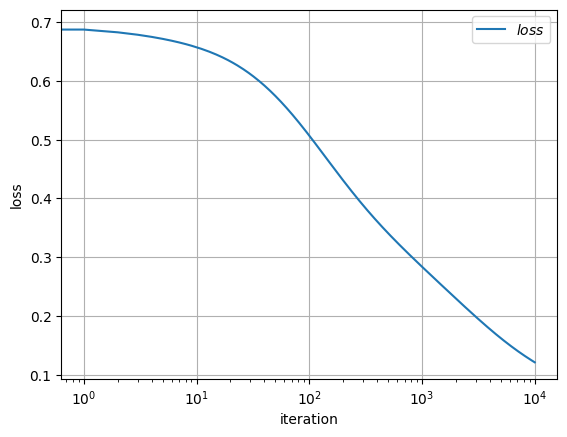

training instances: [[4.5 2.3 1.3 0.3]
 [7.9 3.8 6.4 2. ]
 [5.9 3.2 4.8 1.8]
 [5.1 3.8 1.6 0.2]
 [6.2 2.8 4.8 1.8]
 [6.5 2.8 4.6 1.5]
 [6.  3.4 4.5 1.6]
 [5.8 2.8 5.1 2.4]
 [4.4 3.  1.3 0.2]
 [5.8 2.7 5.1 1.9]
 [5.9 3.  5.1 1.8]
 [6.3 3.4 5.6 2.4]
 [5.7 2.5 5.  2. ]
 [6.2 2.9 4.3 1.3]
 [6.9 3.1 5.1 2.3]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.3 3.  1.1 0.1]
 [6.2 2.2 4.5 1.5]
 [4.8 3.4 1.6 0.2]
 [6.9 3.1 4.9 1.5]
 [5.  3.3 1.4 0.2]
 [6.7 3.1 4.4 1.4]
 [7.7 2.6 6.9 2.3]
 [5.7 2.8 4.5 1.3]
 [5.8 2.7 4.1 1. ]
 [4.6 3.1 1.5 0.2]
 [5.1 3.5 1.4 0.3]
 [7.7 3.  6.1 2.3]
 [4.7 3.2 1.6 0.2]
 [5.4 3.7 1.5 0.2]
 [4.6 3.6 1.  0.2]
 [4.7 3.2 1.3 0.2]
 [5.4 3.4 1.5 0.4]
 [5.7 2.9 4.2 1.3]
 [5.5 2.5 4.  1.3]
 [5.2 3.5 1.5 0.2]
 [6.7 2.5 5.8 1.8]
 [6.4 3.2 4.5 1.5]
 [4.9 3.  1.4 0.2]
 [5.4 3.9 1.3 0.4]
 [4.9 2.5 4.5 1.7]
 [6.7 3.1 4.7 1.5]
 [4.9 3.1 1.5 0.2]
 [6.5 3.  5.8 2.2]
 [5.  2.3 3.3 1. ]
 [6.1 2.6 5.6 1.4]
 [5.  3.5 1.6 0.6]
 [6.4 2.7 5.3 1.9]
 [5.1 3.4 1.5 0.2]
 [4.6 3.2 1.4 0.2]
 [6.  2.9 4

In [ ]:
#
#  Learning Algorithm of Binomial Logistic Regression
#

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# plot learning curve (loss vs interation)
def plot_learning_curve(losses, epochs):
    x1 = np.arange(0, epochs)
    x2= losses

    plt.plot(x1, x2, label = '$loss$')

    plt.legend()
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.xscale('log')
    plt.grid()
    plt.show()


# plot linear model, instances and labels
def plot_linear_classifier(instances, labels, weights, bias):

    # separate to positive and negative instances
    pos_instances = instances[labels == 1]
    neg_instances = instances[labels != 1]

    # plot instances
    plt.scatter(pos_instances[:, 0], pos_instances[:, 1], marker='o', c='green', label='positive')
    plt.scatter(neg_instances[:, 0], neg_instances[:, 1], marker='x', c='blue', label='negative')

    # calculate points in 2d space
    x1 = np.arange(-2, 6, 0.1)
    k = - weights[0] / weights[1] if weights[1] != 0 else 0
    b = - bias / weights[1] if weights[1] != 0 else 0
    x2 = k * x1 + b

    # plot line of model in 2d space
    plt.plot(x1, x2, label = '$w_1 x_1 + w_2 x_2 + b = 0$', c='red')

    # dynamically set axis limits
    x_min, x_max = instances[:, 0].min() - 1, instances[:, 0].max() + 1
    y_min, y_max = instances[:, 1].min() - 1, instances[:, 1].max() + 1
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.axhline()
    plt.axvline()
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.grid()
    plt.legend()
    plt.show()


# calculate accuracy (1.0-error rate) in classification
def calculate_accuracy(labels, predicted_labels):
    correct_predictions = (labels == predicted_labels)
    accuracy = np.mean(correct_predictions)
    return accuracy


# logistic regression function
def sigmoid_function(x):
    x = np.clip(x, -50, 50)
    return 1.0 / (1.0 + np.exp(-x))

# calculate average logistic loss
def logistic_loss(t, y):
    # clip predictions to avoid log(0)
    y = np.clip(y, 1e-6, 1 - 1e-6)
    # calculate loss
    loss = - np.mean(t * np.log(y) + (1 - t) * np.log(1 - y))
    return loss


class Logistic_Regression:
    def __init__(self, num_features):

        # initialize model parameters
        self.num_features = num_features
        self.num_classes = 2
        self.weights = np.zeros(num_features)
        self.bias = 0

    # logistic function gives probability of instance
    def predict(self, instances):
        # make prediction given input instance (features)
        probs = sigmoid_function(np.dot(instances, self.weights) + self.bias)
        labels = (probs >= 0.5).astype(int)
        return probs, labels

    def train(self, instances, labels, learning_rate, epochs):

        losses = np.zeros(epochs)
        # train binomial logistic regression given training instances and labels
        # iteratively update weights and bias of logistic regression model
        # use gradient descent
        for epoch in range(epochs):

            predicted_probs, _ = self.predict(instances)

            # calculate errors
            errors = predicted_probs - labels
            # calculate weight gradient
            weight_gradient = np.dot(errors, instances)
            # calculate bias gradient
            bias_gradient = np.sum(errors)

            # update weights and bias
            num_samples = len(instances)
            self.weights -= learning_rate * weight_gradient / num_samples
            self.bias -= learning_rate * bias_gradient / num_samples

            # calculate and store loss
            loss = logistic_loss(labels, predicted_probs)
            losses[epoch] = loss

        # plot loss in training
        plot_learning_curve(losses, epochs)


def create_data():

    # dataset one
    # num_features = 1
    # training_instances = np.array([[0.50], [0.75], [1.00], [1.25], [1.50], [1.75], [1.75], [2.00], [2.25], [2.5], [2.75], [3.00], [3.25], [3.50], [4.00], [4.25], [4.50], [4.75], [5.00], [5.00]])
    # training_labels = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

    # test_instances = np.array([[2], [4]])
    # test_labels = np.array([0, 1])

    # dataset two
    num_features = 2
    training_instances = np.array([[5, 9], [3, 12], [-1, 12], [2, 10], [1, 12], [2, -3], [4, 4.5], [1, 1], [1.5, -3], [3, -2], [4, -5], [3.5, 8], [-1, 4], [-1, -1]])
    training_labels = np.array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

    test_instances = np.array([[3, 5], [2, 5]])
    test_labels = np.array([1, 0])

    # dataset three: iris data
    # load the Iris dataset
    iris = load_iris()

    # separate instances and labels
    instances = iris.data  # shape: (150, 4)
    labels = iris.target  # shape: (150, )
    num_features = 4

    # reset labels to 1 or -1
    labels = np.array([1 if label == 2 else 0 for label in labels])

    # split into training and test data
    # test_size=0.2 means 20% of the data is for testing
    # random_state sets a seed
    training_instances, test_instances, training_labels, test_labels = train_test_split(
    instances, labels, test_size=0.2, random_state=21)

    return training_instances, training_labels, test_instances, test_labels, num_features



if __name__ == '__main__':

    # create data set
    training_instances, training_labels, test_instances, test_labels, num_features = create_data()

    # set parameters
    learning_rate = 0.01
    epochs = 10000

    # initialize linear_svm
    model = Logistic_Regression(num_features)

    # training of model from training instances and labels
    model.train(training_instances, training_labels, learning_rate, epochs)

    # plot linear model, instances and labels
    # plot only when data is in two dimensional space
    print('training instances:', training_instances)
    print('training labels:', training_labels)
    print('model:', model.weights, model.bias)
    if (num_features == 2):
        plot_linear_classifier(training_instances, training_labels, model.weights, model.bias)

    # prediction of model on test instances
    _, predicted_labels = model.predict(test_instances)
    predicted_labels = np.array(predicted_labels)

    # evaluate accuracy of model on test data
    accuracy = calculate_accuracy(test_labels, predicted_labels)
    print('test instances:', test_instances)
    print('test labels:', test_labels)
    print('predicted test labels:', predicted_labels)
    print(f'accuracy on test data: {100 * accuracy:.2f}%')


Multinomial Logistic Regression, Gradient Descent

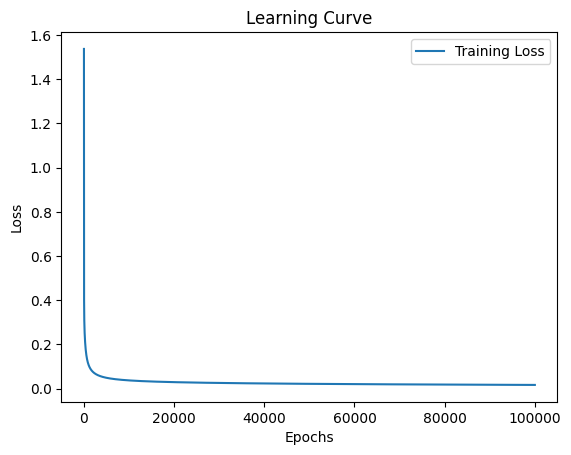

training instances: [[ 0.53405042 -1.40355713  0.66828547  0.41339533]
 [ 1.61821292 -0.20564208  1.18016371  0.54498006]
 [-0.67057458  1.47143898 -1.26547675 -1.29720605]
 [-0.06826208 -0.92439111  0.78203619  0.93973422]
 [ 0.05220042 -0.20564208  0.78203619  0.8081495 ]
 [ 0.89543792 -0.20564208  0.38390868  0.28181061]
 [-0.30918708 -0.44522509 -0.0710942   0.15022589]
 [ 1.85913792 -0.6848081   1.35078979  0.93973422]
 [ 0.17266292 -2.12230616  0.15640724 -0.24452827]
 [ 1.01590042  0.51310694  1.12328835  1.72924255]
 [-1.15242458  0.03394093 -1.26547675 -1.42879077]
 [-0.30918708 -0.20564208  0.2132826   0.15022589]
 [-0.42964958  0.99227296 -1.37922747 -1.29720605]
 [-0.91149958  1.71102199 -1.03797531 -1.03403661]
 [ 1.01590042 -0.20564208  0.72516083  0.67656478]
 [-0.55011208  0.75268995 -1.15172603 -1.29720605]
 [ 1.13636292 -0.6848081   0.61141011  0.28181061]
 [ 0.41358792  0.75268995  0.95266227  1.46607311]
 [-0.18872458 -1.16397412 -0.12796956 -0.24452827]
 [-0.550112

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split


def plot_learning_curve(losses, epochs):
    plt.plot(range(epochs), losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

def calculate_accuracy(true_labels, predicted_labels):
    true_labels = np.argmax(true_labels, axis=1)  # convert one-hot to class indices
    accuracy = np.mean(true_labels == predicted_labels)
    return accuracy

# softmax activation function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # for numerical stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# cross-entropy loss for softmax
def cross_entropy_loss(t, y):
    y = np.clip(y, 1e-6, 1 - 1e-6)
    loss = - np.mean(np.sum(t * np.log(y), axis=1))
    return loss

# one-hot encode labels
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels.flatten()]

# define the class of multinomial logistic regression class
class MultinominalLogisticRegression:
    def __init__(self, input_size, output_size):
        # initialize weights and biases
        self.input_size = input_size
        self.output_size = output_size

        # initialize weights with random values
        self.weights = np.random.randn(self.input_size, self.output_size)
        # initialize biases with zeros
        self.biases = np.zeros((1, self.output_size))

    # forward pass
    def forward(self, instances):
        # inputs to outputs
        self.outputs = softmax(np.dot(instances, self.weights) + self.biases)

        return self.outputs

    # backward pass
    def backward(self, instances, labels, learning_rate):

        # calculate number of instances
        num_samples = instances.shape[0]

        # calculate errors of output layer
        output_errors = self.outputs - labels

        # update weights using gradient descent
        self.weights -=  np.dot(instances.T, output_errors) * learning_rate / num_samples

        # update biases using gradient descent
        self.biases -= np.sum(output_errors, axis=0) * learning_rate / num_samples


    # train the model using gradient descent
    def train(self, instances, labels, learning_rate, epochs):
        losses = np.zeros(epochs)
        for epoch in range(epochs):
            # forward pass
            probabilities = self.forward(instances)

            # backward pass
            self.backward(instances, labels, learning_rate)

            # calculate and store loss
            losses[epoch] = cross_entropy_loss(labels, probabilities)

        plot_learning_curve(losses, epochs)


    # predict class labels
    def predict(self, instances):
        outputs = self.forward(instances)
        return np.argmax(outputs, axis=1)


def create_data():

    # dataset one: iris data
    # load the Iris dataset
    iris = load_iris()

    # separate instances and labels
    instances = iris.data  # shape: (150, 4)
    labels = np.array(iris.target)  # shape: (150, )
    num_features = 4
    num_classes = 3

    # split into training and test data
    # test_size=0.2 means 20% of the data is for testing
    # random_state sets a seed
    training_instances, test_instances, training_labels, test_labels = train_test_split(
    instances, labels, test_size=0.2, random_state=77)

    # # dataset two: wine recognition data
    # # Load the dataset
    # wine = load_wine()

    # # extract the features and labels
    # num_features = wine.data.shape[1]
    # num_classes = len(np.unique(wine.target))

    # # split the dataset into training and testing sets
    # training_instances, test_instances, training_labels, test_labels = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

    # normalize data
    training_instances = (training_instances - np.mean(training_instances, axis=0)) / np.std(training_instances, axis=0)
    test_instances = (test_instances - np.mean(test_instances, axis=0)) / np.std(test_instances, axis=0)

    # one-hot encode labels
    training_labels = one_hot_encode(training_labels, num_classes)
    test_labels = one_hot_encode(test_labels, num_classes)

    return training_instances, training_labels, test_instances, test_labels, num_classes, num_features


if __name__ == '__main__':

    # create data set
    training_instances, training_labels, test_instances, test_labels, num_classes, num_features = create_data()

    # set hyperparameters of learning
    learning_rate = 0.1
    epochs = 100000
    input_size = num_features
    output_size = num_classes

    model = MultinominalLogisticRegression(input_size, output_size)

    # training of model from training instances and labels using gradient descent
    model.train(training_instances, training_labels, learning_rate, epochs)

    # print model and training samples
    print('training instances:', training_instances)
    print('training labels:', training_labels)
    # evaluate accuracy of model on test data
    # prediction of model on test instances
    predicted_labels = model.predict(test_instances)
    predicted_labels = np.array(predicted_labels)

    accuracy = calculate_accuracy(test_labels, predicted_labels)

    print('test instances:', test_instances)
    print('test labels:', test_labels)
    print('predicted test labels:', predicted_labels)
    print(f'accuracy on test data: {100 * accuracy:.2f}%')


Multinomial Logistic Regression, BFGS

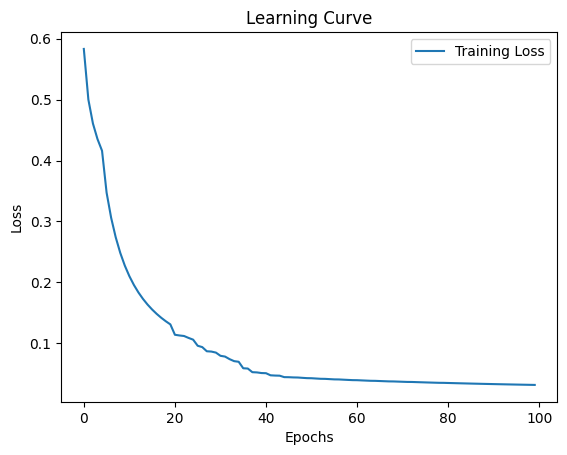

training instances: [[ 0.53405042 -1.40355713  0.66828547  0.41339533]
 [ 1.61821292 -0.20564208  1.18016371  0.54498006]
 [-0.67057458  1.47143898 -1.26547675 -1.29720605]
 [-0.06826208 -0.92439111  0.78203619  0.93973422]
 [ 0.05220042 -0.20564208  0.78203619  0.8081495 ]
 [ 0.89543792 -0.20564208  0.38390868  0.28181061]
 [-0.30918708 -0.44522509 -0.0710942   0.15022589]
 [ 1.85913792 -0.6848081   1.35078979  0.93973422]
 [ 0.17266292 -2.12230616  0.15640724 -0.24452827]
 [ 1.01590042  0.51310694  1.12328835  1.72924255]
 [-1.15242458  0.03394093 -1.26547675 -1.42879077]
 [-0.30918708 -0.20564208  0.2132826   0.15022589]
 [-0.42964958  0.99227296 -1.37922747 -1.29720605]
 [-0.91149958  1.71102199 -1.03797531 -1.03403661]
 [ 1.01590042 -0.20564208  0.72516083  0.67656478]
 [-0.55011208  0.75268995 -1.15172603 -1.29720605]
 [ 1.13636292 -0.6848081   0.61141011  0.28181061]
 [ 0.41358792  0.75268995  0.95266227  1.46607311]
 [-0.18872458 -1.16397412 -0.12796956 -0.24452827]
 [-0.550112

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split


def plot_learning_curve(losses, epochs):
    plt.plot(range(epochs), losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

def calculate_accuracy(true_labels, predicted_labels):
    true_labels = np.argmax(true_labels, axis=1)  # convert one-hot to class indices
    accuracy = np.mean(true_labels == predicted_labels)
    return accuracy

# softmax activation function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # for numerical stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# cross-entropy loss for softmax
def cross_entropy_loss(params, instances, labels, input_size, output_size):
    weights = params[:input_size * output_size].reshape(input_size, output_size)
    biases = params[input_size * output_size:].reshape(1, output_size)

    predictions = softmax(np.dot(instances, weights) + biases)
    predictions = np.clip(predictions, 1e-6, 1 - 1e-6)
    loss = - np.mean(np.sum(labels * np.log(predictions), axis=1))
    return loss

# one-hot encode labels
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels.flatten()]

# define the class of multinomial logistic regression
class MultinominalLogisticRegression:
    def __init__(self, input_size, output_size):
        # initialize weights and biases
        self.input_size = input_size
        self.output_size = output_size

        # initialize weights with random values
        self.weights = np.random.randn(self.input_size, self.output_size)
        # initialize biases with zeros
        self.biases = np.zeros((1, self.output_size))


   # train the model using BFGS
    def train(self, instances, labels, epochs):
        parameters = np.concatenate([self.weights.flatten(), self.biases.flatten()])

        losses = np.zeros(epochs)
        for epoch in range(epochs):
            interm = minimize(cross_entropy_loss, parameters, args=(instances, labels, self.input_size, self.output_size),
                           method='BFGS', options={'maxiter': 1})
            parameters = interm.x
            losses[epoch] = interm.fun

        self.weights = interm.x[:self.input_size * self.output_size].reshape(self.input_size, self.output_size)
        self.biases = interm.x[self.input_size * self.output_size:].reshape(1, self.output_size)

        plot_learning_curve(losses, epochs)


    # predict class labels
    def predict(self, instances):
        predictions = softmax(np.dot(instances, self.weights) + self.biases)
        labels = np.argmax(predictions, axis=1)
        return predictions, labels


def create_data():

    # dataset one: iris data
    # load the Iris dataset
    iris = load_iris()

    # separate instances and labels
    instances = iris.data  # shape: (150, 4)
    labels = np.array(iris.target)  # shape: (150, )
    num_features = 4
    num_classes = 3

    # split into training and test data
    # test_size=0.2 means 20% of the data is for testing
    # random_state sets a seed
    training_instances, test_instances, training_labels, test_labels = train_test_split(
    instances, labels, test_size=0.2, random_state=77)

    # # dataset two: wine recognition data
    # # Load the dataset
    # wine = load_wine()

    # # extract the features and labels
    # num_features = wine.data.shape[1]
    # num_classes = len(np.unique(wine.target))

    # # split the dataset into training and testing sets
    # training_instances, test_instances, training_labels, test_labels = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

    # normalize data
    training_instances = (training_instances - np.mean(training_instances, axis=0)) / np.std(training_instances, axis=0)
    test_instances = (test_instances - np.mean(test_instances, axis=0)) / np.std(test_instances, axis=0)

    # one-hot encode labels
    training_labels = one_hot_encode(training_labels, num_classes)
    test_labels = one_hot_encode(test_labels, num_classes)

    return training_instances, training_labels, test_instances, test_labels, num_classes, num_features


if __name__ == '__main__':

    # create data set
    training_instances, training_labels, test_instances, test_labels, num_classes, num_features = create_data()

    # set hyperparameters of learning
    epochs = 100
    input_size = num_features
    output_size = num_classes

    model = MultinominalLogisticRegression(input_size, output_size)

    # training of model from training instances and labels using BFGS
    model.train(training_instances, training_labels, epochs)

    # # print model and training samples
    print('training instances:', training_instances)
    print('training labels:', training_labels)
    # evaluate accuracy of model on test data
    # prediction of model on test instances
    _, predicted_labels = model.predict(test_instances)
    predicted_labels = np.array(predicted_labels)

    accuracy = calculate_accuracy(test_labels, predicted_labels)

    print('test instances:', test_instances)
    print('test labels:', test_labels)
    print('predicted test labels:', predicted_labels)
    print(f'accuracy on test data: {100 * accuracy:.2f}%')



# Support Vector Machine

Linear SVM

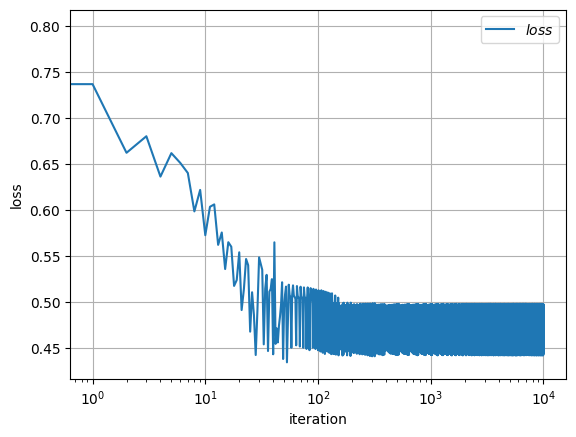

training instances: [[ 5.   9. ]
 [ 3.  12. ]
 [-1.  12. ]
 [ 2.  10. ]
 [ 1.  12. ]
 [ 2.  -3. ]
 [ 4.   4.5]
 [ 1.   1. ]
 [ 1.5 -3. ]
 [ 3.  -2. ]
 [ 4.  -5. ]
 [ 3.5  8. ]
 [-1.   4. ]
 [-1.  -1. ]]
training labels: [ 1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1]
model: [0.27321743 0.21947402] -1.6400000000000012


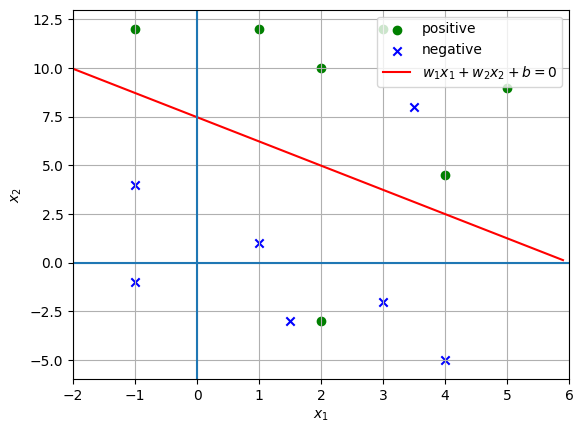

test instances: [[ 2.  -3. ]
 [ 3.5  8. ]]
test labels: [-1  1]
predicted test labels: [-1  1]
accuracy on test data: 100.0%


In [ ]:

#
#  Learning Algorithm of Linear SVM
#

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# plot learning curve (loss vs interation)
def plot_learning_curve(losses, epochs):
    x1 = np.arange(0, epochs)
    x2= losses

    plt.plot(x1, x2, label = '$loss$')

    plt.legend()
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.xscale('log')
    plt.grid()
    plt.show()


# plot linear model, instances and labels
def plot_linear_classifier(instances, labels, weights, bias):

    # separate to positive and negative instances
    pos_instances = instances[labels == 1]
    neg_instances = instances[labels != 1]

    # plot instances
    plt.scatter(pos_instances[:, 0], pos_instances[:, 1], marker='o', c='green', label='positive')
    plt.scatter(neg_instances[:, 0], neg_instances[:, 1], marker='x', c='blue', label='negative')

    # calculate points in 2d space
    x1 = np.arange(-2, 6, 0.1)
    k = - weights[0] / weights[1] if weights[1] != 0 else 0
    b = - bias / weights[1] if weights[1] != 0 else 0
    x2 = k * x1 + b

    # plot line of model in 2d space
    plt.plot(x1, x2, label = '$w_1 x_1 + w_2 x_2 + b = 0$', c='red')

    # dynamically set axis limits
    x_min, x_max = instances[:, 0].min() - 1, instances[:, 0].max() + 1
    y_min, y_max = instances[:, 1].min() - 1, instances[:, 1].max() + 1
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.axhline()
    plt.axvline()
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.grid()
    plt.legend()
    plt.show()


# calculate accuracy (1.0-error rate) in classification
def calculate_accuracy(labels, predicted_labels):
    correct_predictions = (labels == predicted_labels)
    accuracy = np.mean(correct_predictions)
    return accuracy


# hinge loss function
def hinge_loss_function(x):
    return max(0, 1-x)


# class of linear support vector machine
class Linear_SVM:
    def __init__(self, num_features):

        # initialize parameters of model
        self.num_features = num_features
        self.num_classes = 2
        self.weights = np.zeros(num_features)
        self.bias = 0

    def predict(self, instance):

        # make prediction given an input instance (features)
        # function of linear svm
        score = np.dot(instance, self.weights) + self.bias
        label = 1 if score >= 0.0 else -1
        return score, label

    def train(self, training_instances, training_labels, learning_rate, regularization, epochs):

        # train linear support vector machine model given training instances and labels
        # iteratively update weights and bias of linear svm using SGD (stochastic gradient descent)
        losses = np.zeros(epochs)      # store prediction losses
        num_samples = len(training_instances)
        for epoch in range(epochs):
            hinge_loss = 0.0
            for instance, label in zip(training_instances, training_labels):
                predicted_score, _ = self.predict(instance)
                margin = label * predicted_score
                if margin < 1:
                    self.weights += learning_rate * label * instance - learning_rate * regularization * self.weights
                    self.bias += learning_rate * label
                else:
                    self.weights -= learning_rate * regularization * self.weights
                hinge_loss += hinge_loss_function(margin)

            # store hinge loss of prediction
            losses[epoch] = hinge_loss / num_samples

        # plot losses in training
        plot_learning_curve(losses, epochs)


def create_data():

    # # dataset one
    # num_features = 2
    # training_instances = np.array([[3, 3], [4, 3], [1, 1]])
    # training_labels = np.array([1, 1, -1])

    # test_instances = np.array([[3, 1], [4, 2]])
    # test_labels = np.array([1, 1])

    # dataset two
    num_features = 2
    training_instances = np.array([[5, 9], [3, 12], [-1, 12], [2, 10], [1, 12], [2, -3], [4, 4.5], [1, 1], [1.5, -3], [3, -2], [4, -5], [3.5, 8], [-1, 4], [-1, -1]])
    training_labels = np.array([1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1])

    test_instances = np.array([[2, -3], [3.5, 8]])
    test_labels = np.array([-1, 1])

    # # dataset three: iris data
    # # load the Iris dataset
    # iris = load_iris()

    # # separate instances and labels
    # instances = iris.data  # shape: (150, 4)
    # labels = iris.target  # shape: (150, )
    # num_features = 4

    # # reset labels to 1 or -1
    # labels = np.array([1 if label == 2 else -1 for label in labels])

    # # split into training and test data
    # # test_size=0.2 means 20% of the data is for testing
    # # random_state sets a seed
    # training_instances, test_instances, training_labels, test_labels = train_test_split(
    # instances, labels, test_size=0.2, random_state=21)

    return training_instances, training_labels, test_instances, test_labels, num_features


if __name__ == '__main__':

    # create data set
    training_instances, training_labels, test_instances, test_labels, num_features = create_data()

    # set hyperparameters of learning
    learning_rate = 0.01
    regularization = 0.01
    epochs = 10000

    # initialize linear svm
    model = Linear_SVM(num_features)

    # training of model from training instances and labels
    model.train(training_instances, training_labels, learning_rate, regularization, epochs)

    # plot linear model, instances and labels
    # plot only when data is in two dimensional space
    print('training instances:', training_instances)
    print('training labels:', training_labels)
    print('model:', model.weights, model.bias)
    if (num_features == 2):
        plot_linear_classifier(training_instances, training_labels, model.weights, model.bias)

    # evaluate accuracy of model on test data
    # prediction of model on test instances
    _, predicted_labels = zip(*[model.predict(instance) for instance in test_instances])
    predicted_labels = np.array(predicted_labels)

    accuracy = calculate_accuracy(test_labels, predicted_labels)
    print('test instances:', test_instances)
    print('test labels:', test_labels)
    print('predicted test labels:', predicted_labels)
    print(f'accuracy on test data: {100 * accuracy}%')



# Boosting

AdaBoost

GBDT

# Conditional Random Field

# Hidden Markkov Model